Ma'lumotlarni tozalash  

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Ma'lumotlar to‘plami haqida
Supermarket Sales Dataset (Supermarket savdolarining ma’lumotlar to‘plami) — supermarketdagi tranzaksiyalar haqida batafsil ma’lumot beradi. Unda mahsulot kategoriyalari, birlik narxlari, sotilgan miqdor va yalpi daromad kabi ko‘rsatkichlar kuzatib borilgan. Shuningdek, xaridorlarning jinsi, to‘lov usuli va a’zolik turi kabi demografik ma’lumotlar ham mavjud.

Bu dataset quyidagilarni tahlil qilish uchun juda qulay:

savdo tendensiyalari,

mijozlar xatti-harakati,

daromad samaradorligi.

Bu orqali reklama va mahsulot strategiyalarini yanada samarali rejalashtirish mumkin bo‘ladi.

🔑 Asosiy ustunlar (maydonlar):

Invoice ID – Har bir tranzaksiya uchun noyob identifikator (chek raqami).

Branch – Supermarket filialining belgilanishi (masalan, A, B, C).

City – Filial joylashgan shahar nomi.

Customer Type – Xaridor turi: "Member" (a’zo) yoki "Normal" (oddiy).

Gender – Xaridor jinsi (demografik tahlil uchun).

Product Line – Mahsulot kategoriyasi (masalan, oziq-ovqat, kiyim-kechak).

Unit Price – Har bir mahsulot birligi uchun narx.

Quantity – Xarid qilingan birliklar soni.

Tax (5%) – Soliq miqdori (umumiy narxning 5%).

https://www.kaggle.com/datasets/willianoliveiragibin/market-sales-data

In [191]:
df = pd.read_csv('supermarket_sales new.csv')
df.head()

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


In [192]:
df.shape

(1000, 9)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [194]:
df.describe()

,Unit price,Quantity,Tax 5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


In [195]:
df.isnull().sum()

,0
Gender,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0


In [196]:
df.duplicated().sum()

np.int64(0)

In [197]:
df.columns

Index(['Gender', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%'],
      dtype='object')

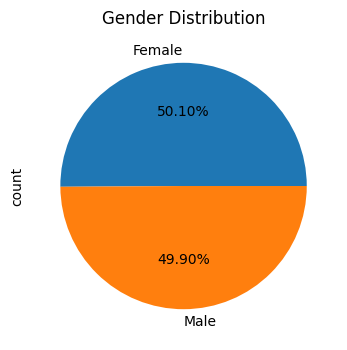

In [198]:
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Gender Distribution')
plt.show()

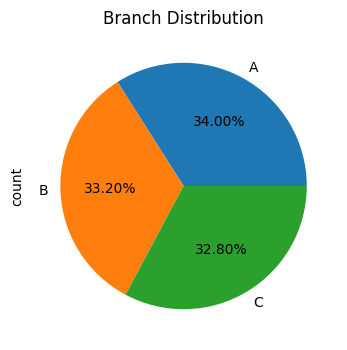

In [199]:
plt.figure(figsize=(4,4))
df['Branch'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('Branch Distribution')
plt.show()

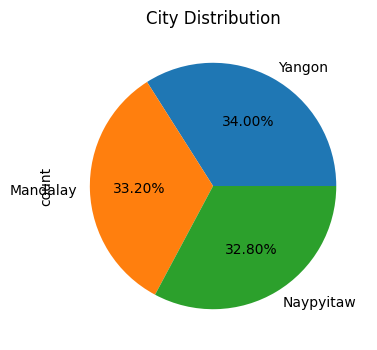

In [200]:
plt.figure(figsize=(4,4))
df['City'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('City Distribution')
plt.show()

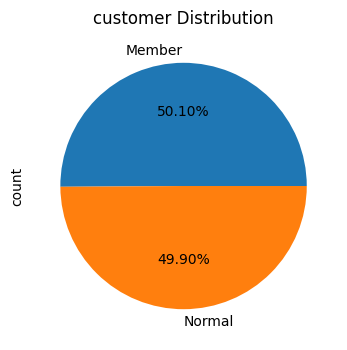

In [201]:
plt.figure(figsize=(4,4))
df['Customer type'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.title('customer Distribution')
plt.show()

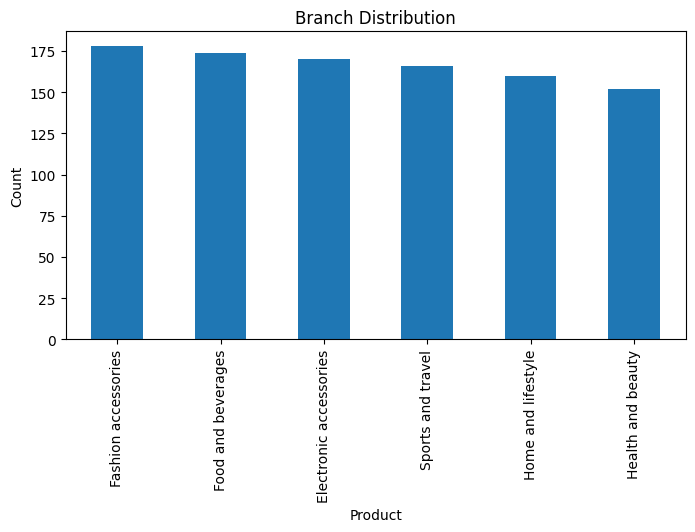

In [202]:
plt.figure(figsize=(8,4))
df['Product line'].value_counts().plot(kind = 'bar')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Branch Distribution')
plt.show()

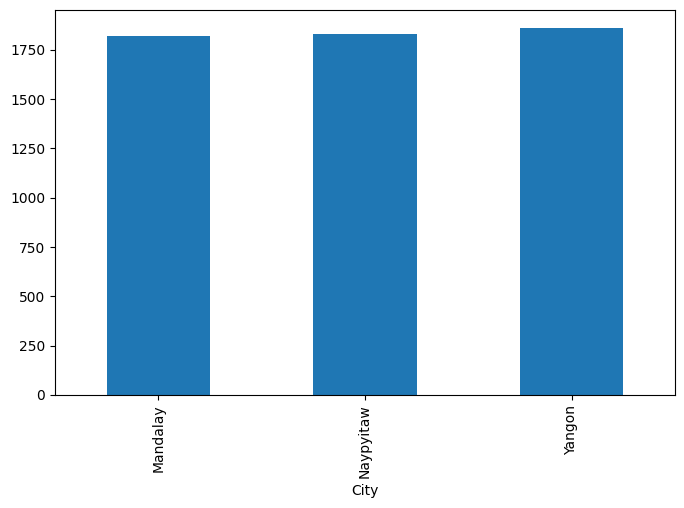

In [203]:
city_quantity = df.groupby('City')['Quantity'].sum().sort_values()
city_quantity.plot(kind='bar', figsize=(8, 5))
plt.show()

In [204]:
new_df = df.drop('Invoice ID', axis = 1)
new_df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...
995,Male,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [205]:
cat_colm = new_df.select_dtypes(include='object').columns.to_list()

In [206]:
encode = LabelEncoder()

In [207]:
for col in cat_colm:
  new_df[col] = encode.fit_transform(new_df[col])

In [208]:
new_df

,Gender,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,0,0,2,0,3,74.69,7,261.4150
1,0,2,1,1,0,15.28,5,3.8200
2,0,0,2,0,0,68.84,6,20.6520
3,0,2,1,1,4,73.56,10,36.7800
4,0,0,2,0,3,36.26,2,3.6260
...,...,...,...,...,...,...,...,...
995,1,0,2,1,0,58.03,2,5.8030
996,1,1,0,1,1,17.49,10,8.7450
997,1,2,1,1,3,40.35,1,2.0175
998,1,0,2,0,2,31.84,1,1.5920


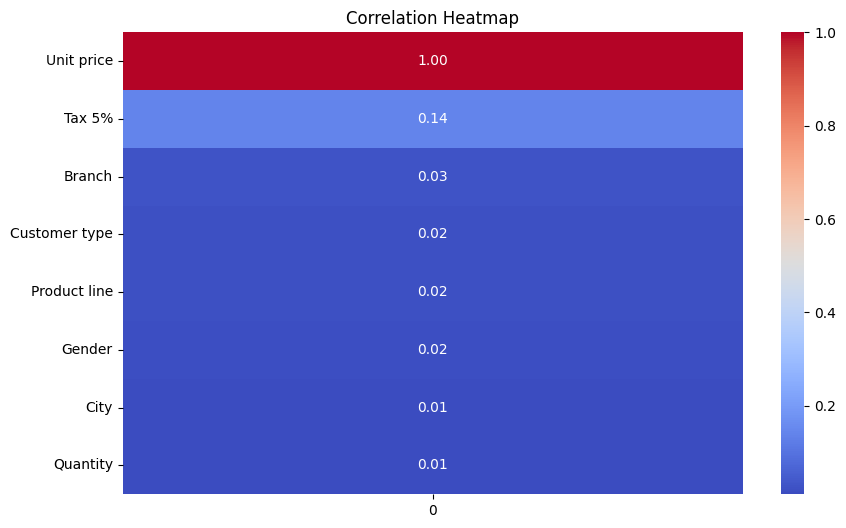

In [209]:
corr_price = new_df.corrwith(df['Unit price']).abs().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [210]:
x = new_df.drop('Unit price', axis = 1)
y = new_df['Unit price']

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [212]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Linear Regression

In [213]:
lm = LinearRegression()
lm.fit(x_train_scaled, y_train)

LinearRegression()

In [214]:
lm_pred = lm.predict(x_test_scaled)
lm_pred

array([55.54543359, 56.62406252, 55.17134198, 55.47078407, 54.98613757,
       55.83410909, 55.10449938, 61.05716088, 62.21549588, 54.89593171,
       56.85026147, 54.82107197, 56.09960168, 56.72297109, 55.30265204,
       61.03029962, 54.43200409, 55.05835823, 62.93497089, 54.75934603,
       54.63457683, 53.90928164, 53.27786703, 57.77716782, 54.09937216,
       55.25508754, 53.85605123, 56.64869716, 55.71208094, 57.02258008,
       65.9794346 , 51.87202142, 55.07080612, 53.3273949 , 53.01241519,
       53.70737713, 56.6450154 , 57.03001523, 57.39270738, 63.12550046,
       54.10940136, 65.77425285, 54.68731035, 56.4125971 , 53.80117772,
       53.46375041, 55.19729522, 56.03212488, 55.2036105 , 55.61491706,
       55.03387474, 54.97456708, 53.44742179, 56.73792248, 53.15648781,
       61.34304489, 85.4295537 , 61.3072039 , 53.97926769, 55.68875388,
       59.86508523, 65.61323579, 57.38748117, 52.43252295, 56.4418906 ,
       56.48326825, 56.68985732, 55.16571342, 55.25226866, 55.76

In [215]:
r2_score(y_test, lm_pred)

0.03230329376359431

In [216]:
mean_squared_error(y_test, lm_pred)

679.1985006373346

Random Forest Regressor

In [217]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [218]:
rf_pred = rf.predict(x_test_scaled)
rf_pred

array([30.0935, 34.8384, 38.1548, 29.1506, 22.5707, 36.3301, 52.249 ,
       92.4301, 68.6122, 51.0037, 58.2405, 87.8844, 77.8057, 39.2249,
       24.2682, 55.3654, 75.3715, 65.5346, 55.3194, 27.1921, 89.9569,
       59.6793, 37.7219, 44.2054, 47.1712, 49.3223, 57.2542, 49.0565,
       89.8631, 88.5367, 87.147 , 13.9468, 12.2038, 97.1963, 96.6364,
       20.9422, 70.5476, 72.6869, 67.7738, 91.8   , 72.027 , 91.7296,
       89.2292, 65.0455, 29.852 , 50.2741, 52.2858, 39.8698, 83.6413,
       72.3912, 73.1258, 93.0149, 27.9095, 70.8987, 20.2996, 56.6234,
       18.093 , 68.0014, 76.4677, 82.7553, 45.6138, 82.5876, 48.5822,
       24.2181, 20.8424, 74.3087, 60.7411, 45.4884, 92.2532, 78.3479,
       15.7513, 96.0089, 68.2854, 22.7407, 36.2462, 46.765 , 45.0139,
       18.5982, 50.4181, 81.4697, 21.5881, 34.5427, 42.9237, 81.2138,
       92.2876, 95.228 , 31.5253, 26.1304, 97.9092, 41.0852, 80.7456,
       82.0617, 56.3153, 75.0307, 91.1297, 35.3326, 35.3618, 24.822 ,
       90.6925, 80.2

In [219]:
r2_score(y_test, rf_pred)

0.9040163845810547

In [220]:
mean_squared_error(y_test, rf_pred)

67.36814051154992

Random state ni o'zgartirib ko'ramiz

In [221]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26)

In [222]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Linear Regression

In [223]:
lm = LinearRegression()
lm.fit(x_train_scaled, y_train)

LinearRegression()

In [224]:
lm_pred = lm.predict(x_test_scaled)
lm_pred

array([56.11581702, 55.52543494, 55.74943611, 55.24792427, 55.19128182,
       54.29202577, 53.56782095, 55.69406763, 59.5642381 , 60.92959783,
       54.57186322, 56.18206335, 53.81105034, 54.828011  , 56.14412313,
       55.24870127, 80.27627053, 54.16059683, 55.03545598, 55.39566565,
       54.85927482, 54.99151045, 54.47118024, 59.82344328, 55.46988615,
       55.13056327, 54.46439801, 67.39640899, 55.13950659, 55.11870486,
       54.41835895, 61.34023849, 55.74293607, 55.58219292, 53.88440263,
       64.83862656, 65.82303667, 55.12373264, 53.42900428, 55.24385659,
       55.12048243, 54.36594401, 54.66292476, 56.25581946, 54.85599182,
       54.79633219, 55.38182914, 54.86737939, 54.0711612 , 55.57831668,
       54.72606303, 55.27382786, 53.62785661, 55.95618284, 54.43958372,
       55.5824719 , 55.85865983, 55.42729899, 54.66127123, 55.78790284,
       54.75091198, 55.88337436, 55.26236234, 55.16793174, 55.43300767,
       55.29361727, 54.38901817, 54.66321379, 53.66194071, 54.89

In [225]:
r2_score(y_test, lm_pred)

0.02316186476259985

In [226]:
mean_squared_error(y_test, lm_pred)

623.1337098890648

Random Forest Regressor

In [227]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [228]:
rf_pred = rf.predict(x_test_scaled)
rf_pred

array([60.102 , 83.376 , 16.1879, 37.6656, 76.3397, 34.9863, 31.38  ,
       21.0538, 66.8998, 47.9832, 78.3584, 52.253 , 23.7075, 22.6789,
       98.5906, 79.8913, 16.1566, 89.9615, 95.4757, 70.7482, 65.9322,
       22.7531, 21.5273, 70.5278, 23.6775, 28.0804, 90.3524, 88.5334,
       40.0144, 81.9784, 27.5318, 52.0724, 61.0457, 99.6559, 51.1008,
       74.1616, 79.0014, 95.7418, 36.7212, 74.1734, 33.1788, 44.9011,
       19.2892, 78.8112, 57.4928, 67.3114, 28.9347, 35.9291, 20.1584,
       90.5496, 87.4841, 77.8355, 36.7011, 60.4504, 28.6051, 36.8973,
       72.8265, 26.916 , 83.4371, 45.1013, 51.0375, 44.9025, 85.3811,
       39.5317, 26.7191, 74.3875, 52.3153, 55.0107, 24.5411, 88.4176,
       97.2111, 76.0159, 55.9412, 74.6091, 83.6882, 53.4682, 66.3342,
       32.2954, 89.6959, 10.7536, 14.5279, 56.7444, 24.0102, 22.0545,
       64.4245, 82.9775, 39.07  , 19.0512, 45.753 , 59.4522, 88.112 ,
       64.1949, 31.0942, 62.3582, 53.9294, 43.6531, 22.6543, 15.5695,
       94.9687, 67.3

In [229]:
r2_score(y_test, rf_pred)

0.9952924418649943

In [230]:
mean_squared_error(y_test, rf_pred)

3.0029930848999986